In [1]:
import pandas as pd
import numpy as np

## **About Dataset**
This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research.

**Key Features:**

**Order_ID:** Unique identifier for each order.

**Distance_km:** The delivery distance in kilometers.

**Weather:** Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

**Traffic_Level:** Traffic conditions categorized as Low, Medium, or High.

**Time_of_Day:** The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

**Vehicle_Type:** Type of vehicle used for delivery, including Bike, Scooter, and Car.

**Preparation_Time_min:** The time required to prepare the order, measured in minutes.

**Courier_Experience_yrs:** Experience of the courier in years.

**Delivery_Time_min:** The total delivery time in minutes (target variable).

In [2]:
df = pd.read_csv('/content/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
df.shape

(1000, 9)

#### **By this we can conclude that the data has the**
#### **9 ---> Column**
#### **1000 ---> Row**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


### **From this we can say that**

2.   **Weather**       

3.   **Traffic_Level**

4.   **Time_of_Day**  

5.   **Vehicle_Type**

**this are the categorical values and we have to transform it**

In [5]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [6]:
# here order_id is the irrelevant feature we will drop that feature

df.drop('Order_ID', axis=1, inplace=True)
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


## **Checking missing values in columns.**

In [7]:
df.isnull().sum()

,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


We can say that there are 30 values that are missing from the
1. Weather                -------> Categorical
2. Traffic_Level          -------> Categorical
3. Time_of_day            -------> Categorical
4. Courier-Experience_yrs -------> Float



In [8]:
print('Weather: ', df.Weather.unique())
print('Traffic_Level: ', df.Traffic_Level.unique())
print('TimeofDay: ', df.Time_of_Day.unique())
print('Vehicle_Type: ', df.Vehicle_Type.unique())

Weather:  ['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy' nan]
Traffic_Level:  ['Low' 'Medium' 'High' nan]
TimeofDay:  ['Afternoon' 'Evening' 'Night' 'Morning' nan]
Vehicle_Type:  ['Scooter' 'Bike' 'Car']


here we are getting nan and that should be here it is missing value. So it is a categorical value so we will fill that with the mode

In [9]:
print(df.Weather.value_counts())
print('\nMode:', df.Weather.mode()[0])

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

Mode: Clear


**We can say that people are order the food when the weather is clear.**

In [10]:
print(df.Traffic_Level.value_counts())
print(df.Traffic_Level.mode())

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64
0    Medium
Name: Traffic_Level, dtype: object


In [11]:
print(df.Time_of_Day.value_counts())
print('TimeofDay: ',df.Time_of_Day.mode())

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64
TimeofDay:  0    Morning
Name: Time_of_Day, dtype: object


In [12]:
print(df.Vehicle_Type.value_counts())
print('TimeofDay: ',df.Vehicle_Type.mode())

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64
TimeofDay:  0    Bike
Name: Vehicle_Type, dtype: object


**Through that we can say that the mostly people order the food in the morning and the more order is delivered by bike.**


In [13]:
information = df.groupby(['Weather', 'Time_of_Day']).size().reset_index().rename(columns={0:'counts'}).sort_values(by=['Weather', 'counts'])

In [14]:
information

,Weather,Time_of_Day,counts
3,Clear,Night,39
0,Clear,Afternoon,132
1,Clear,Evening,138
2,Clear,Morning,147
7,Foggy,Night,13
5,Foggy,Evening,28
4,Foggy,Afternoon,29
6,Foggy,Morning,31
11,Rainy,Night,16
10,Rainy,Morning,59


### **Fixing the missing value and performing the encoding.**

In [15]:
df.Weather.fillna(df.Weather.mode()[0], inplace=True)

<ipython-input-15-464bfc8e1ea7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Weather.fillna(df.Weather.mode()[0], inplace=True)


In [16]:
df.isnull().sum()

,0
Distance_km,0
Weather,0
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [17]:
#Fixing the missing value of Traffic_level column
df.Traffic_Level.fillna(df.Traffic_Level.mode()[0], inplace=True)

<ipython-input-17-5dfe3cdf5bb9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Traffic_Level.fillna(df.Traffic_Level.mode()[0], inplace=True)


In [18]:
df.Time_of_Day.fillna(df.Time_of_Day.mode()[0], inplace=True)

<ipython-input-18-491d6f609033>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Time_of_Day.fillna(df.Time_of_Day.mode()[0], inplace=True)


In [19]:
df.isnull().sum()

,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 1000 non-null   object 
 2   Traffic_Level           1000 non-null   object 
 3   Time_of_Day             1000 non-null   object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  970 non-null    float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [21]:
df.Courier_Experience_yrs.describe()

,Courier_Experience_yrs
count,970.000000
mean,4.579381
std,2.914394
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,9.000000


In [22]:
df.Courier_Experience_yrs.median()

5.0

In [23]:
df.Courier_Experience_yrs.fillna(df.Courier_Experience_yrs.median(), inplace=True)

<ipython-input-23-b9a1c350abf5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Courier_Experience_yrs.fillna(df.Courier_Experience_yrs.median(), inplace=True)


In [24]:
df.isnull().sum()

,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


## **Data distribution using histograms, box plots, and KDE plots.**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df.dtypes

,0
Distance_km,float64
Weather,object
Traffic_Level,object
Time_of_Day,object
Vehicle_Type,object
Preparation_Time_min,int64
Courier_Experience_yrs,float64
Delivery_Time_min,int64


### **Here there are three numerical values distance_km, preparation_time, Courier_Experience and Delivery_time(target variable)**

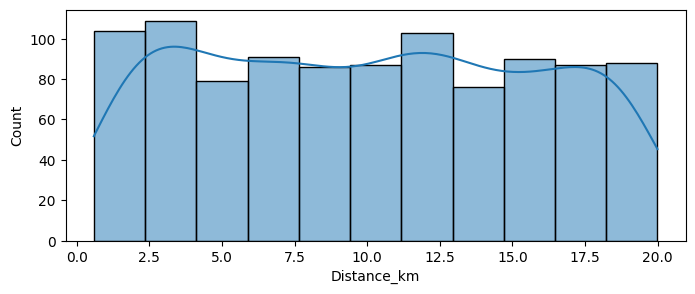

In [27]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='Distance_km', kde=True)
plt.show()

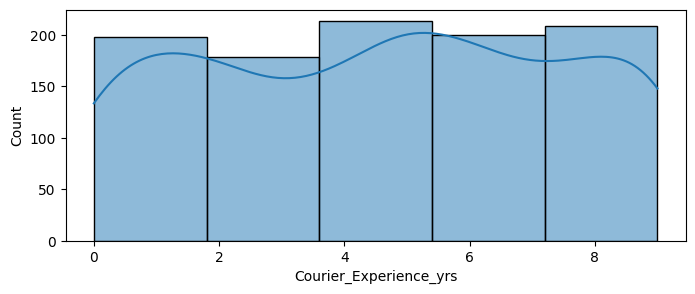

In [28]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='Courier_Experience_yrs', bins=5, kde=True)
plt.show()

In [29]:
print(df["Courier_Experience_yrs"].skew())  # If >0, right-skewed; <0, left-skewed
print(df["Courier_Experience_yrs"].kurt())  # High values mean heavy tails


-0.04262066812874942
-1.213689012975085


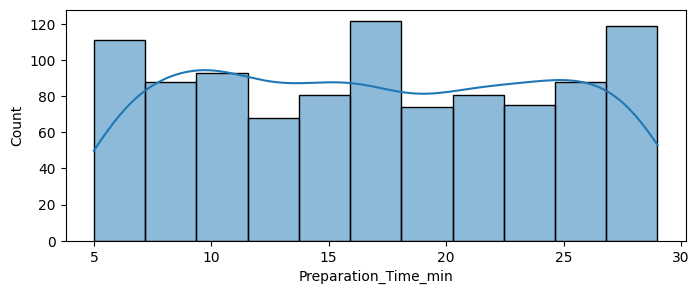

In [30]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='Preparation_Time_min', kde=True)
plt.show()

In [31]:
print(df["Preparation_Time_min"].skew())  # If >0, right-skewed; <0, left-skewed
print(df["Preparation_Time_min"].kurt())  # High values mean heavy tails


0.030008161330597263
-1.2369284171666324


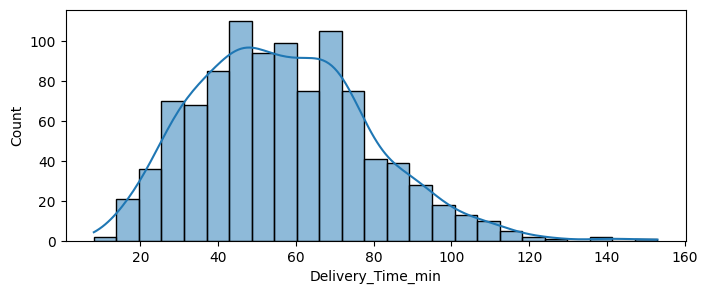

In [32]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='Delivery_Time_min', kde=True)
plt.show()

In [33]:
print(df["Delivery_Time_min"].skew())  # If >0, right-skewed; <0, left-skewed
print(df["Delivery_Time_min"].kurt())  # High values mean heavy tails


0.5072511816152696
0.29133821183324615


### **we can say that the distance_km, preparation_time and courier_experiences_yrs are not normally distributed.**



## **Boxplots**

In [34]:
df.columns

Index(['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

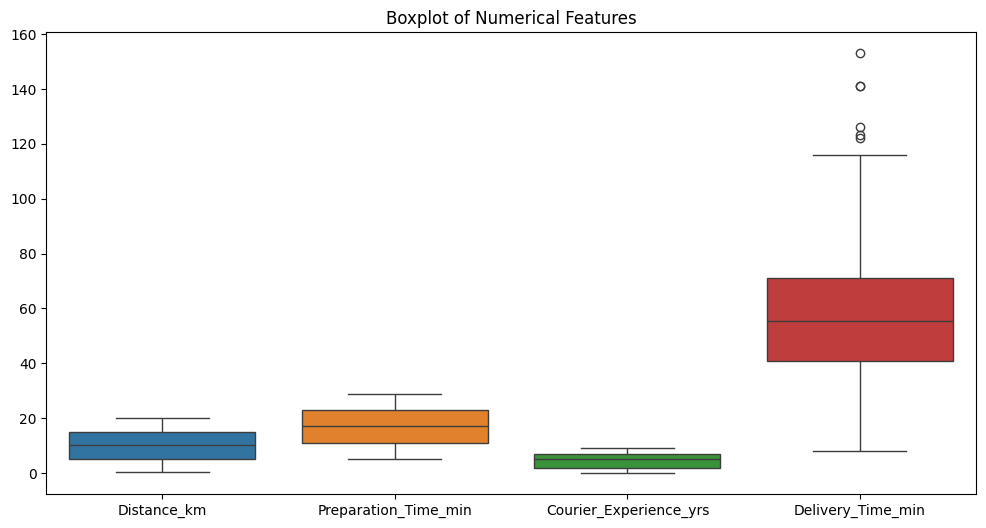

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"]])
plt.title("Boxplot of Numerical Features")
plt.show()

In [36]:
df.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.059970,16.982000,4.592000,56.732000
std,5.696656,7.204553,2.871198,22.070915
min,0.590000,5.000000,0.000000,8.000000
25%,5.105000,11.000000,2.000000,41.000000
50%,10.190000,17.000000,5.000000,55.500000
75%,15.017500,23.000000,7.000000,71.000000
max,19.990000,29.000000,9.000000,153.000000


In [37]:
df['Delivery_Time_min'].isnull().sum()

0

In [38]:
Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)
print(Q1, Q3)
IQR = Q3-Q1

lowerf = Q1 - 1.5*IQR
print(lowerf)
higherf = Q3 + 1.5*IQR
print(higherf)

ouliers = df[(df['Delivery_Time_min'] < lowerf) | (df['Delivery_Time_min'] > higherf)]
ouliers.Delivery_Time_min

41.0 71.0
-4.0
116.0


,Delivery_Time_min
29,123
127,141
379,153
452,141
784,126
924,122


there are some outliers so we will perfrom the capping insted of trimming because the maybe the extreme data's are rare values.

In [39]:
df.Delivery_Time_min = np.where(
    df.Delivery_Time_min > higherf,
    higherf, np.where(
        df.Delivery_Time_min < lowerf,
        lowerf,
        df.Delivery_Time_min
    )
)

In [40]:
Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)
print(Q1, Q3)
IQR = Q3-Q1

lowerf = Q1 - 1.5*IQR
print(lowerf)
higherf = Q3 + 1.5*IQR
print(higherf)

ouliers = df[(df['Delivery_Time_min'] < lowerf) | (df['Delivery_Time_min'] > higherf)]
ouliers.Delivery_Time_min

41.0 71.0
-4.0
116.0


,Delivery_Time_min


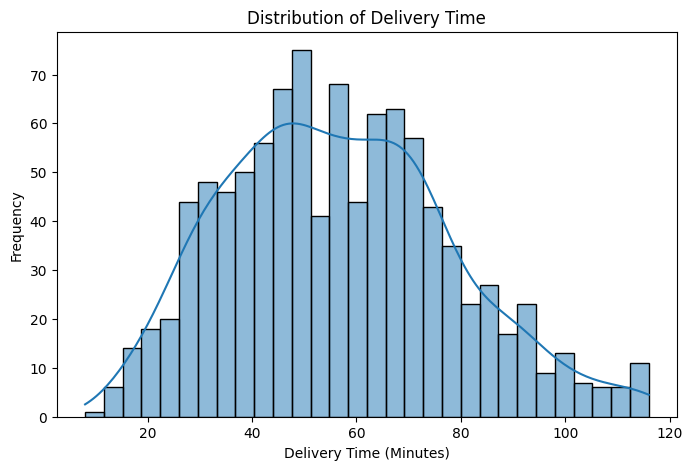

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Delivery_Time_min"], bins=30, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.show()


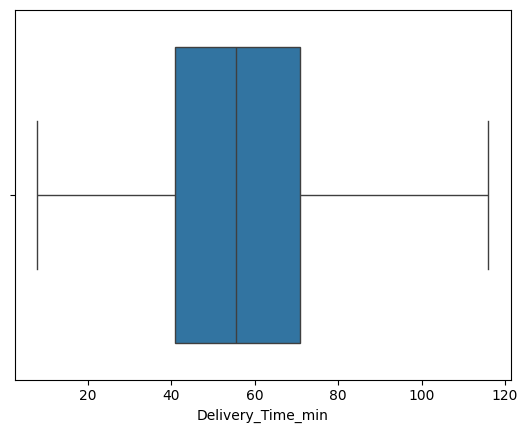

In [42]:
sns.boxplot(x='Delivery_Time_min', data=df)
plt.show()

### **Encoding**

In [43]:
#encoding for the Weather

df.Weather.unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy'], dtype=object)

In [44]:
df.Weather.head(5)

,Weather
0,Windy
1,Clear
2,Foggy
3,Rainy
4,Clear


In [45]:
df_city = pd.get_dummies(df['Weather'], dtype='int64', drop_first=True)
df_city.head()

,Foggy,Rainy,Snowy,Windy
0,0,0,0,1
1,0,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,0


In [46]:
df = pd.concat([df, df_city], axis=1)
df.drop('Weather', axis=1, inplace=True)
df.head(5)

,Distance_km,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy
0,7.93,Low,Afternoon,Scooter,12,1.0,43.0,0,0,0,1
1,16.42,Medium,Evening,Bike,20,2.0,84.0,0,0,0,0
2,9.52,Low,Night,Scooter,28,1.0,59.0,1,0,0,0
3,7.44,Medium,Afternoon,Scooter,5,1.0,37.0,0,1,0,0
4,19.03,Low,Morning,Bike,16,5.0,68.0,0,0,0,0


In [47]:
#the unique values and counts of that

df.Traffic_Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [48]:
#Now for the Traffic Level label encoding

df.Traffic_Level = df.Traffic_Level.map({'Low': 0, 'Medium': 1, 'High': 2})
df.head()

,Distance_km,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy
0,7.93,0,Afternoon,Scooter,12,1.0,43.0,0,0,0,1
1,16.42,1,Evening,Bike,20,2.0,84.0,0,0,0,0
2,9.52,0,Night,Scooter,28,1.0,59.0,1,0,0,0
3,7.44,1,Afternoon,Scooter,5,1.0,37.0,0,1,0,0
4,19.03,0,Morning,Bike,16,5.0,68.0,0,0,0,0


In [49]:
# now for vechile type

df_vehicle = pd.get_dummies(df['Vehicle_Type'], dtype=int, drop_first=True)
df_vehicle

,Car,Scooter
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
995,1,0
996,0,1
997,0,1
998,0,0


In [50]:
df = pd.concat([df, df_vehicle], axis=1)
df.drop('Vehicle_Type', axis=1, inplace=True)
df.head()

,Distance_km,Traffic_Level,Time_of_Day,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Car,Scooter
0,7.93,0,Afternoon,12,1.0,43.0,0,0,0,1,0,1
1,16.42,1,Evening,20,2.0,84.0,0,0,0,0,0,0
2,9.52,0,Night,28,1.0,59.0,1,0,0,0,0,1
3,7.44,1,Afternoon,5,1.0,37.0,0,1,0,0,0,1
4,19.03,0,Morning,16,5.0,68.0,0,0,0,0,0,0


In [51]:
#Lets handle the Time_of_Day

df.Time_of_Day.value_counts()

,count
Time_of_Day,
Morning,338
Evening,293
Afternoon,284
Night,85


In [52]:
# one hot encoding
df_timofday = pd.get_dummies(df.Time_of_Day, dtype=int, drop_first=True)
df_timofday

,Evening,Morning,Night
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,1,0
...,...,...,...
995,1,0,0
996,0,1,0
997,1,0,0
998,0,0,0


In [53]:
df = pd.concat([df, df_timofday], axis=1)
df.drop('Time_of_Day', axis=1, inplace=True)
df.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
0,7.93,0,12,1.0,43.0,0,0,0,1,0,1,0,0,0
1,16.42,1,20,2.0,84.0,0,0,0,0,0,0,1,0,0
2,9.52,0,28,1.0,59.0,1,0,0,0,0,1,0,0,1
3,7.44,1,5,1.0,37.0,0,1,0,0,0,1,0,0,0
4,19.03,0,16,5.0,68.0,0,0,0,0,0,0,0,1,0


there is no duplicated value in the data

### **Transformation**

In [75]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
final_df = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)

final_df

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
0,0.378351,0.0,0.291667,0.111111,0.324074,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.815979,0.5,0.625000,0.222222,0.703704,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.460309,0.0,0.958333,0.111111,0.472222,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.353093,0.5,0.000000,0.111111,0.268519,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.950515,0.0,0.458333,0.555556,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.407732,1.0,0.333333,0.333333,0.425926,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
996,0.808763,0.0,0.125000,1.000000,0.583333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
997,0.774742,1.0,0.875000,0.222222,0.675926,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
998,0.700000,0.0,0.125000,0.000000,0.435185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Feature selection**

### **Duplicate values removing**

In [76]:
df2 = final_df.columns[final_df.columns.duplicated()]
df2

Index([], dtype='object')

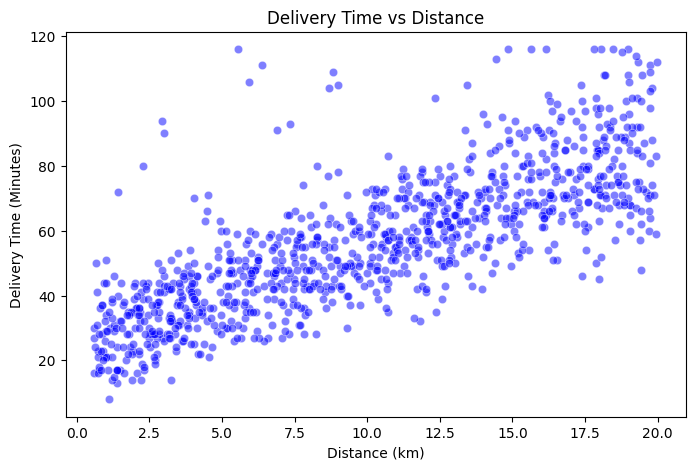

In [94]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Distance_km"], y=df["Delivery_Time_min"], color="blue", alpha=0.5)
plt.title("Delivery Time vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (Minutes)")
plt.show()

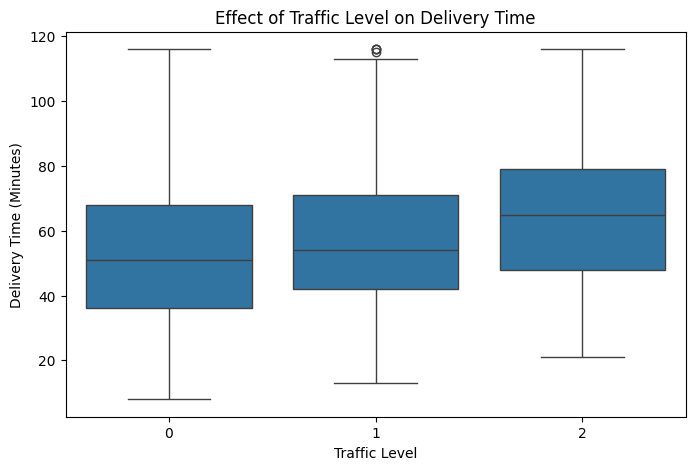

In [90]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Traffic_Level"], y=df["Delivery_Time_min"])
plt.title("Effect of Traffic Level on Delivery Time")
plt.xlabel("Traffic Level")
plt.ylabel("Delivery Time (Minutes)")
plt.show()

### **Correlation**

In [77]:
from sklearn.model_selection import train_test_split

x= final_df.drop('Delivery_Time_min', axis=1)
y= final_df['Delivery_Time_min']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
105,0.115979,0.0,0.791667,0.222222,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
68,0.771649,0.5,0.375000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
479,0.342784,0.5,0.958333,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399,0.132990,0.0,0.500000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
434,0.701031,0.5,0.166667,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
corr = x_train.corr()
corr

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
Distance_km,1.000000,0.029187,-0.023383,-0.020589,0.006456,-0.013986,0.072141,0.010720,0.053047,-0.055421,0.003502,0.035204,-0.023799
Traffic_Level,0.029187,1.000000,-0.037227,0.074083,-0.010831,-0.013716,-0.027648,0.055123,-0.054181,0.057085,0.001220,-0.002961,0.023567
Preparation_Time_min,-0.023383,-0.037227,1.000000,-0.038972,-0.000443,0.019929,0.008326,-0.070104,-0.007170,0.037086,0.004739,-0.021733,0.009117
Courier_Experience_yrs,-0.020589,0.074083,-0.038972,1.000000,-0.060574,0.070208,0.026661,0.031121,-0.014274,-0.057112,0.036042,-0.017774,-0.023318
Foggy,0.006456,-0.010831,-0.000443,-0.060574,1.000000,-0.166932,-0.109339,-0.108469,0.032723,0.001476,-0.025932,0.013131,-0.027112
Rainy,-0.013986,-0.013716,0.019929,0.070208,-0.166932,1.000000,-0.169638,-0.168288,0.042910,-0.032431,0.030175,-0.008857,-0.035222
Snowy,0.072141,-0.027648,0.008326,0.026661,-0.109339,-0.169638,1.000000,-0.110227,0.039608,-0.066276,0.021082,-0.013990,0.022635
Windy,0.010720,0.055123,-0.070104,0.031121,-0.108469,-0.168288,-0.110227,1.000000,0.018067,-0.032618,-0.039403,0.069884,-0.045886
Car,0.053047,-0.054181,-0.007170,-0.014274,0.032723,0.042910,0.039608,0.018067,1.000000,-0.339508,-0.064902,0.069863,-0.028381
Scooter,-0.055421,0.057085,0.037086,-0.057112,0.001476,-0.032431,-0.066276,-0.032618,-0.339508,1.000000,0.059005,-0.015590,-0.048333


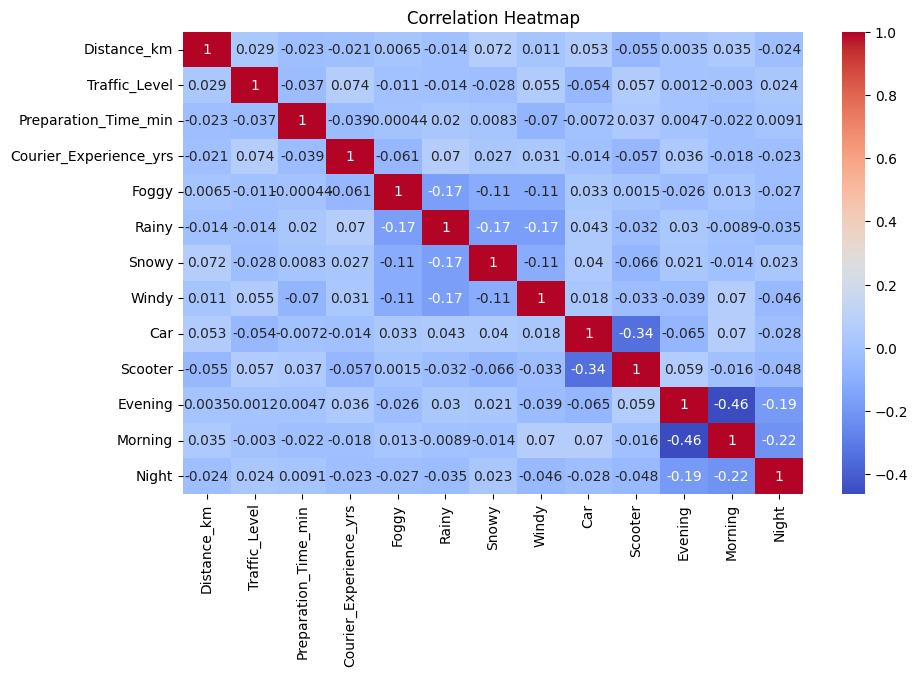

In [95]:
plt.figure(figsize=(10, 6))
sns.heatmap(x_train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()